<a href="https://colab.research.google.com/github/BiancadeFrancisco/Arima_Energia/blob/main/S%C3%89RIES_ATEMPORAIS_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

In [ ]:
!pip install scipy

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.5 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
df = pd.read_excel("/content/energy.xlsx", index_col="DATE", parse_dates= True)

df.head()

,energy
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [ ]:
# VER TAMANO DA NOSSA BASE:

df.shape

#408 linhas e 1 coluna

(408, 1)

In [ ]:
df.describe()

,energy
count,408.000000
mean,88.062232
std,15.168540
min,54.616500
25%,76.499750
50%,88.940450
75%,99.733200
max,126.362600


In [ ]:
# VERIFICAR NOSSA PRIMEIRA E ULTIMA DATA:

df.index.min(), df.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [ ]:
# RENOMEAR A COLUNA ENERGY PARA PRODUÇÃO:

df.columns = ["producao"]

<Axes: xlabel='DATE'>

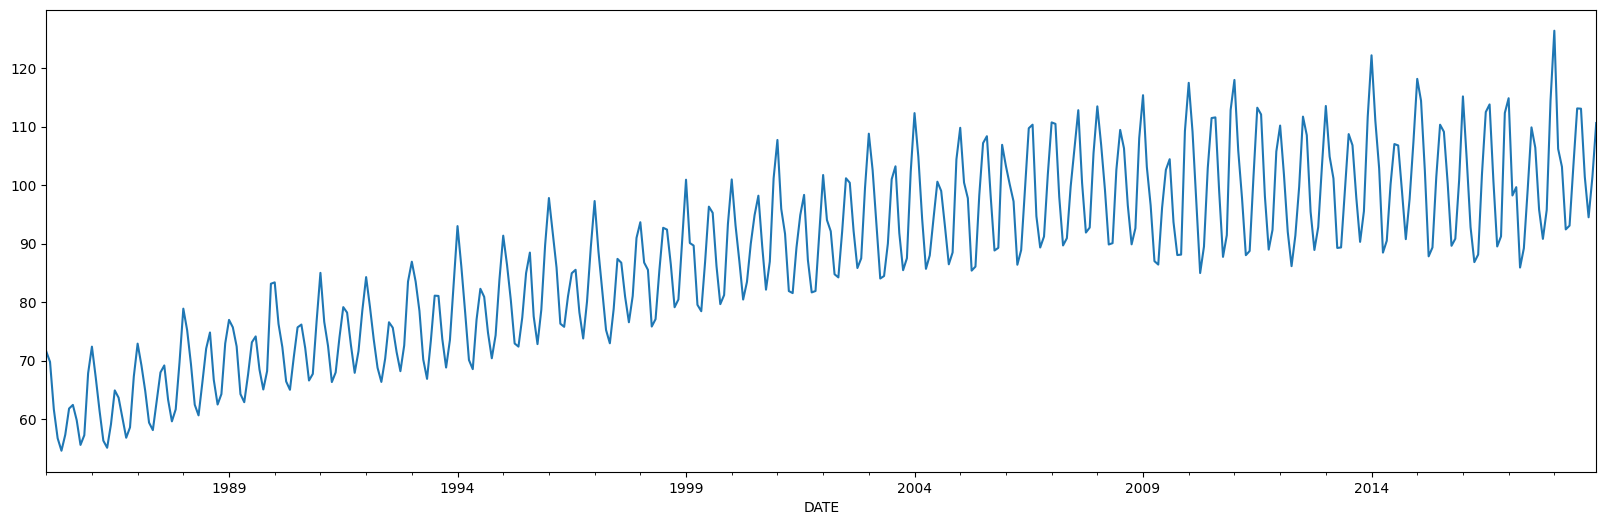

In [ ]:
# ANALISAR DADOS COM GRÁFICO:

df["producao"].plot(figsize=(20,6))

<Figure size 2000x1000 with 0 Axes>

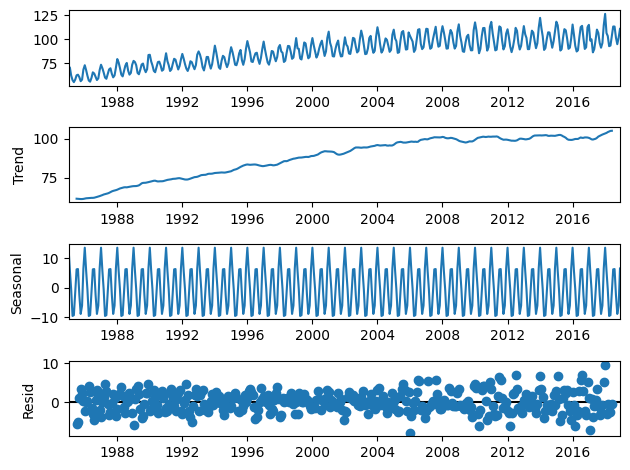

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultado = seasonal_decompose(df)

fig = plt.figure(figsize = (20,10))
fig = resultado.plot()

In [ ]:
# trend = tendencia
# seasonal = tenho uma sazonalidade
# resid = residuo, os pontos de resíduo estão mais distantes da média nos anos mais próximos.

In [ ]:
# TESTE DE ESTACIONARIEDADE (indica que não tenho uma sazonalidade):
# Se eu tiver sazonalidade, posso utilizar o algoritmo do Sarima, que irá performar mais.

from statsmodels.tsa.stattools import adfuller

result = adfuller(df["producao"].dropna())
print(f"Teste ADF:, {result[0]}")
print(f"p-valor:, {result[1]}")

# p-valor = 18%, > 5% = hipótese nula é verdadeira, dessa maneira não posso descartar que a série não é estacionária.

Teste ADF:, -2.252399047046594
p-valor:, 0.18777984601967806


In [ ]:
# TESTE PARA VER SE HÁ DIFERENTE ENTRE O DIA ATUAL E O DIA ANTERIOR, UTILIZANDO ESSE VALOR, ESSA BASE VAI SER OU NÃO ESTACIONÁRIA:

result = adfuller(df["producao"].diff().dropna())
print(f"Teste ADF:, {result[0]}")
print(f"p-valor:, {result[1]}")

# agora o p-valor deu bem abaixo de 5%, posso então descartar a hipótese nula. Dessa maneira tenho uma série com sazonalidade.

Teste ADF:, -7.450892277526341
p-valor:, 5.67456995585561e-11


In [ ]:
# ESCOLHER MELHOR PARAMETRO PARA COLOCAR DENTRO DO MEU MODELO (BASE):

fit_arima = auto_arima(df, d = 1, start_p = 1, start_q = 1, max_p = 3, max_q = 3,
                       seasonal = True,
                       m = 6,
                       D = 1,
                       start_P = 1,
                       start_Q = 1,
                       max_P = 2,
                       max_Q = 2,
                       information_criterion = "aic",
                       trace = True,
                       error_action = "ignore",
                       stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1968.148, Time=0.88 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2494.965, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=2053.701, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2128.799, Time=0.40 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=2064.883, Time=0.60 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=inf, Time=0.52 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=1928.298, Time=1.19 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=1.87 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=1868.200, Time=3.07 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=1866.400, Time=1.98 sec
 ARIMA(1,1,1)(0,1,2)[6]             : AIC=2014.153, Time=0.89 sec
 ARIMA(0,1,1)(1,1,2)[6]             : AIC=1916.488, Time=1.48 sec
 ARIMA(1,1,0)(1,1,2)[6]             : AIC=1936.850, Time=1.29 sec
 ARIMA(2,1,1)(1,1,2)[6]             : AIC=1868.120, Time=2.59 sec
 ARIMA(1,1,2)(1,1,2)[6]             : AIC=1

In [ ]:
# ao fim, ele indica que o melhor modelo é o ARIMA e os melhores parametros são: p = 1, q = 1 e d = 1
# < AIC = < ERRO = MELHOR

In [ ]:
# COMO TENHO UMA SAZONALIDADE NOS MEUS DADOS, CFME INDICA O MEU TESTE, IREI UTILIZAR O MODELO SARIMA:

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df, order=(1,1,1), seasonal_order = (1,1,2,6))

resultado_sarimax = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               producao   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -927.200
Date:                                Tue, 18 Jul 2023   AIC                           1866.400
Time:                                        12:53:29   BIC                           1890.364
Sample:                                    01-01-1985   HQIC                          1875.889
                                         - 12-01-2018                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5125      0.042     12.156      0.000       0.430       0.595
ma.L1         -0.9601      0.017    -56.250      0.000      -0.994      -0.927
ar.S.L6       -0.9973      0.003   -350.055      0.000      -1.003      -0.992
ma.S.L6        0.1026      0.037      2.775      0.006       0.030       0.175
ma.S.L12      -0.7748      0.035    -22.180      0.000      -0.843      -0.706
sigma2         5.6413      0.322     17.544      0.000       5.011       6.272
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                29.17
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# RESULTADOS:
# ar.L1	0.5125(auto regression, o quanto as bases passadas influenciam dentro do nosso modelo, 51%)
# ma.L1	-0.9601 (média móvel de um dia atrás)
# ma.S.L6	0.1026 (média móvel de 6 dias atrás)
# ma.S.L12	-0.7748 (média móvel de 12 dias atrás)

In [ ]:
# FAZER O NOSSO PREDICT:
# treinar o modelo, usando como parâmetro 12 dias atrás


predicoes = resultado_sarimax.get_prediction(start=-12)
predicoes_media = predicoes.predicted_mean

In [ ]:
intervalo_confianca = predicoes.conf_int()
limite_abaixo = intervalo_confianca.iloc[:, 0]
limite_acima = intervalo_confianca.iloc[:, 1]

limite_abaixo[0], limite_acima[0]

# nosso intervalo de confiança vai de 115 até 124.
# 95% de probabilidade de todos nossos resultados preditos estarem dentro desse intervalo.

(115.1447404570401, 124.45517675290846)

In [ ]:
# TIRAR NOSSA PREDIÇÃO MÉDIA:

predicoes_media[0]

# nossa média no meio do intervalo de confiança, tudo que for dado fora desse valor, é nosso resíduo, erro.

119.79995860497428

In [ ]:
# VERIFICAR VALOR GRAFICAMENTE:

datas_previsao = np.asarray(predicoes_media.index)
datas = np.asarray(df.index)

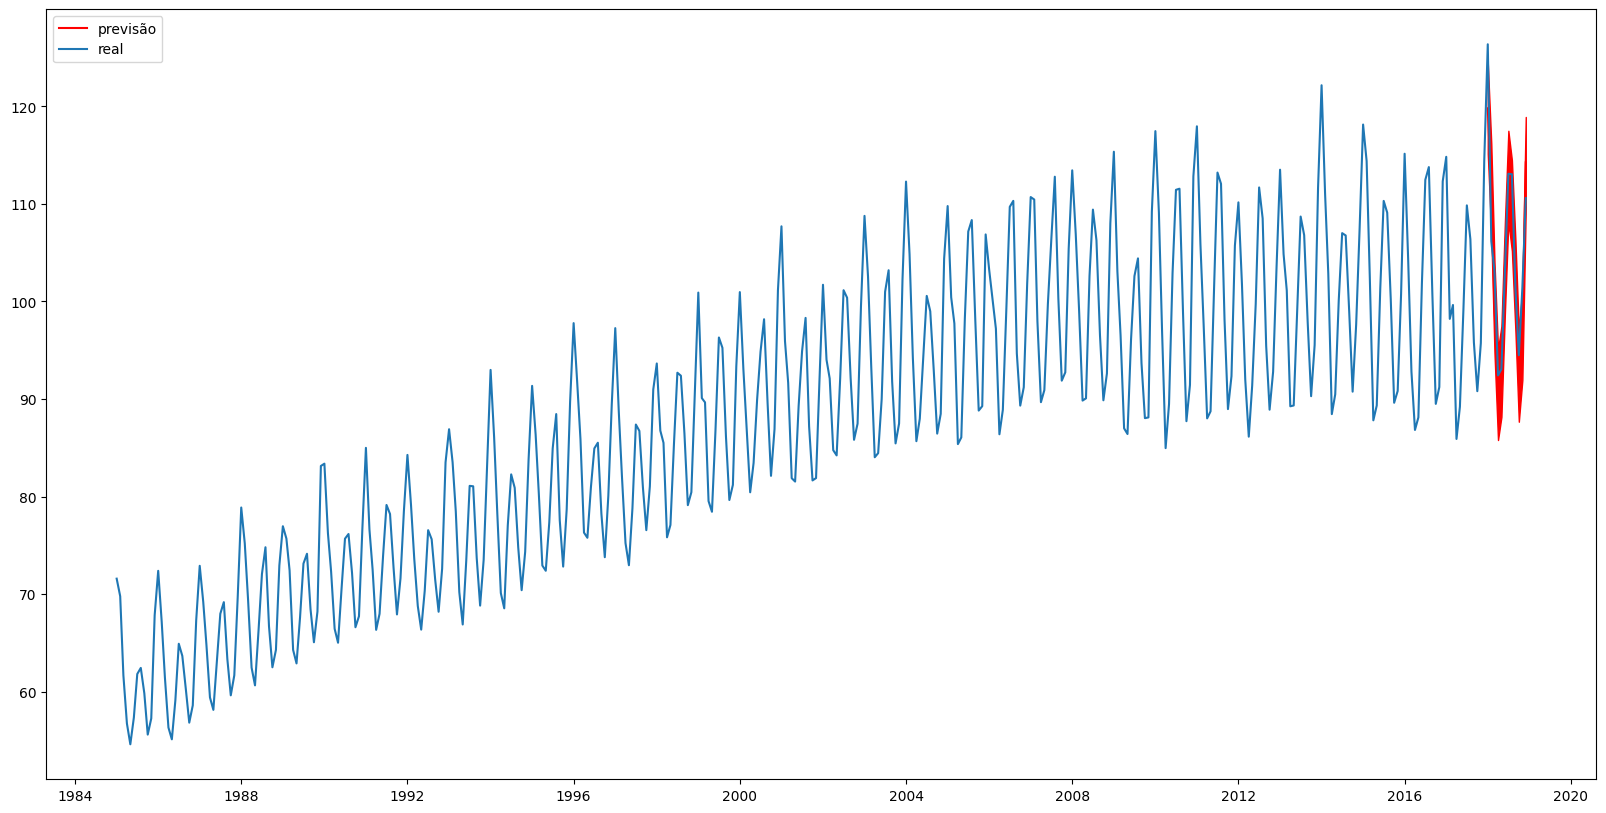

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(datas_previsao, predicoes_media.values, color="red", label="previsão")
plt.fill_between(datas_previsao, limite_abaixo, limite_acima, color="red")
plt.plot(datas, df.values, label="real")
plt.legend()
plt.show()

# EM VERMELHO: PREVISÃO DE 12 DIAS ATRÁS (PASSADO)

In [ ]:
# verificar erro médio quadrado:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df[-12:].values, predicoes_media.values)
print("MAE:", mae)

MAE: 2.7071201498891306


In [ ]:
# UTILIZAR O MÉTODO PARA PREVER O FUTURO:
# 12 dias a frente

forecast = resultado_sarimax.get_forecast(steps=12)
forecast_medio = forecast.predicted_mean
forecast_medio.size

12

In [ ]:
intervalo_confianca_forecast = forecast.conf_int()
intervalo_abaixo_f = intervalo_confianca_forecast.iloc[:, 0]
intervalo_acima_f = intervalo_confianca_forecast.iloc[:, 1]

intervalo_abaixo_f[10], intervalo_acima_f[10]

(91.38813005236821, 103.10930985132882)

In [ ]:
forecast_medio[10]

97.24871995184851

In [ ]:
datas_forecast = np.asarray(forecast_medio.index)
pred_dates = np.asarray(predicoes_media.index)

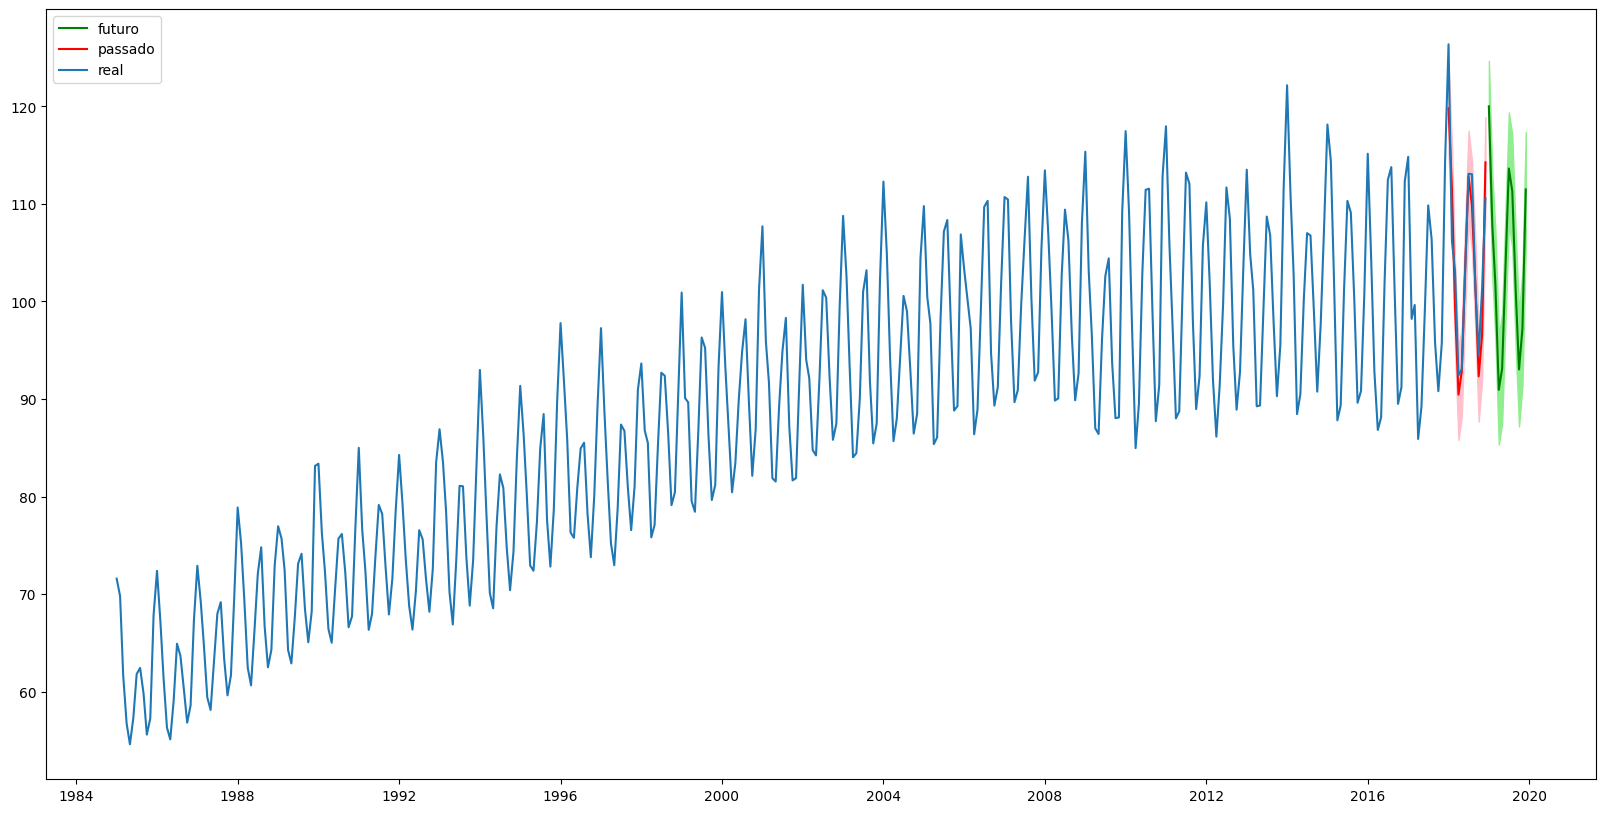

In [ ]:
dates = np.asarray(df.index)
plt.figure(figsize= (20,10))
plt.plot(datas_forecast, forecast_medio.values, color="green", label="futuro")
plt.fill_between(datas_forecast, intervalo_abaixo_f, intervalo_acima_f, color="lightgreen")

plt.plot(datas_previsao, predicoes_media.values, color="red", label="passado")
plt.fill_between(datas_previsao, limite_abaixo, limite_acima, color="pink")

plt.plot(dates, df.values, label="real")
plt.legend(loc="upper left")
plt.show()

# UTILIZANDO ALGORITMO DE MACHINE LEARNING:

DIFERENÇA NO ALGORITMO IMPLEMENTADO NO ARIMA E NO MACHINE LEARNING:
- ARIMA: consigo estabelecer uma quantidade de dias, unidade de anos, unidade de meses tanto para frente, quanto para trás.
- MACHINE LEARNING: consigo prever sempre uma unidade para frente, isso acaba limitando.

In [ ]:
from xgboost import XGBRegressor

In [ ]:
treino = df.loc[df.index < "2016-12-31"]
validacao = df.loc[df.index > "2016-12-31"] #teste

treino.shape, validacao.shape

((384, 1), (24, 1))

In [ ]:
treino.head()

,producao
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [ ]:
treino["target"] = treino["producao"].shift(-1) #shift(-1); irá subir uma casa para cima

treino.head()

<ipython-input-36-9fbbaa853a24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino["target"] = treino["producao"].shift(-1)


,producao,target
DATE,,
1985-01-01,71.5920,69.7870
1985-02-01,69.7870,61.6790
1985-03-01,61.6790,56.7479
1985-04-01,56.7479,54.6165
1985-05-01,54.6165,57.3509


In [ ]:
treino.dropna(inplace=True)

<ipython-input-37-b8dd0b7f87ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino.dropna(inplace=True)


In [ ]:
validacao["target"] = validacao["producao"].shift(-1)
validacao.head()

<ipython-input-38-66ef9ff7cc40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao["target"] = validacao["producao"].shift(-1)


,producao,target
DATE,,
2017-01-01,114.8282,98.2191
2017-02-01,98.2191,99.6408
2017-03-01,99.6408,85.9106
2017-04-01,85.9106,89.2053
2017-05-01,89.2053,99.1945


In [ ]:
validacao.dropna(inplace=True)

<ipython-input-39-bda36cca96cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao.dropna(inplace=True)


In [ ]:
x_treino = treino.loc[:, ["producao"]].values
y_treino = treino.loc[:, ["target"]].values
x_validacao = validacao.loc[:, ["producao"]].values
y_validacao = validacao.loc[:, ["target"]].values

In [ ]:
# COLOCAR O MODELO PARA TREINAR ESSAS FEATURES:

modelo_xgba = XGBRegressor()
modelo_xgba.fit(x_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
validacao.iloc[0]

producao    114.8282
target       98.2191
Name: 2017-01-01 00:00:00, dtype: float64

In [ ]:
predicao = modelo_xgba.predict(x_validacao)

predicao

array([103.86972 , 102.7595  , 109.48729 ,  78.83086 ,  92.39584 ,
        92.556015, 101.47449 , 110.37736 ,  95.53983 ,  99.24283 ,
        95.53983 , 102.701965, 111.40189 ,  98.29675 ,  96.66097 ,
        90.28177 ,  87.64868 ,  99.88448 , 111.89654 , 111.89654 ,
       111.14365 ,  97.18245 , 111.14365 ], dtype=float32)

In [ ]:
validacao["pred"] = predicao
validacao.head()

<ipython-input-44-59e209950550>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao["pred"] = predicao


,producao,target,pred
DATE,,,
2017-01-01,114.8282,98.2191,103.869720
2017-02-01,98.2191,99.6408,102.759499
2017-03-01,99.6408,85.9106,109.487289
2017-04-01,85.9106,89.2053,78.830856
2017-05-01,89.2053,99.1945,92.395844


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(x_validacao, predicao)

6.086205224078634

In [ ]:
# o modelo performou menos que o modelo arima